This notebook has the predictive model which estimates smoke estimates for the next 25 years and the visualizations aasked for in the prompts.

# Section 1: Importing necessary modules

In [1]:
import pandas as pd
import csv
import statsmodels.api as sm
import statsmodels.tsa.api as statsmodels
import numpy as np
import matplotlib.pyplot as plt

# Section 2: Loading dataframe with smoke estimates and aqi by year

In [2]:
pred_data = pd.read_csv('/Users/aviva/Desktop/MSDS/quarter_4/Human Centered Data Science/Part 1/GeoJSON Exports/intermediate_data/pred_df.csv')

In [3]:
pred_data.head()

,GISAcres,shortest_dist,Smoke_Estimate,Year,AQI
0,766.773922,896.624518,0.022618,1963,8.690167
1,1146.301446,870.262828,0.153983,1964,8.694594
2,587.560328,992.533750,0.149189,1965,8.699021
3,1397.433572,932.505220,0.111709,1966,8.703448
4,1175.659287,1010.487956,0.098337,1967,8.707875


# Section 3: Building the predictive model

We first convert the 'Year' column in the 'pred_data' DataFrame to datetime format and set it as the index for time-series analysis.

In [4]:
pred_data['Year'] = pd.to_datetime(pred_data['Year'], format='%Y')  
pred_data.set_index('Year', inplace=True)

Next, we define a Seasonal AutoRegressive Integrated Moving Average (SARIMA) model for time-series forecasting, considering seasonal patterns. The model includes parameters for the ARIMA order and the seasonal order, along with the seasonal period (s) assumed to be 6 months.

In [5]:
s = 6  #seasonal period(assuming 6 months from May 1st to October 31st)

In [6]:
# (p, d, q, P, D, Q, s)
p = 1  #AutoRegressive order
d = 1  #Integrated order
q = 1  #moving Average order
P = 1  #Seasonal AutoRegressive order
D = 1  #seasonal Integrated order
Q = 1  #seasonal Moving Average order

Now, we will extract exogenous variables, 'GISAcres' and 'shortest_dist,' to consider their impact on the 'Smoke_Estimate' in the SARIMA model.

In [7]:
exog_vars = pred_data[['GISAcres', 'shortest_dist']]

Fitting model to time series data

In [8]:
model = sm.tsa.SARIMAX(pred_data['Smoke_Estimate'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

/Users/aviva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/aviva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.54950D-01    |proj g|=  3.05019D-01

At iterate    5    f=  9.16727D-01    |proj g|=  5.49371D-02

At iterate   10    f=  8.81989D-01    |proj g|=  2.61832D-02

At iterate   15    f=  8.76948D-01    |proj g|=  6.79686D-03

At iterate   20    f=  8.76632D-01    |proj g|=  3.35272D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     26      1     0     0   2.408D-06   8.766D-01
  F =  0.87663182775803594     

CONVERG

Generating forecast for the next 25 years

In [9]:
forecast_steps = 25  
forecast = results.get_forecast(steps=forecast_steps)

forecasted_values = forecast.predicted_mean
print(forecasted_values)

2021-01-01    1.506663
2022-01-01    1.469406
2023-01-01    2.255509
2024-01-01    1.317201
2025-01-01    0.759534
2026-01-01    1.350308
2027-01-01    1.691736
2028-01-01    1.676622
2029-01-01    2.477738
2030-01-01    1.491184
2031-01-01    0.927430
2032-01-01    1.506731
2033-01-01    1.873088
2034-01-01    1.857299
2035-01-01    2.657957
2036-01-01    1.672873
2037-01-01    1.109305
2038-01-01    1.688956
2039-01-01    2.054553
2040-01-01    2.038785
2041-01-01    2.839456
2042-01-01    1.854328
2043-01-01    1.290754
2044-01-01    1.870394
2045-01-01    2.236014
Freq: AS-JAN, Name: predicted_mean, dtype: float64


# Section 4: Analyzing the data using time series graphs

In [10]:
analysis_data = pd.read_csv('/Users/aviva/Desktop/MSDS/quarter_4/Human Centered Data Science/Part 1/GeoJSON Exports/intermediate_data/pred_df.csv')

In [11]:
analysis_data.head()

,GISAcres,shortest_dist,Smoke_Estimate,Year,AQI
0,766.773922,896.624518,0.022618,1963,8.690167
1,1146.301446,870.262828,0.153983,1964,8.694594
2,587.560328,992.533750,0.149189,1965,8.699021
3,1397.433572,932.505220,0.111709,1966,8.703448
4,1175.659287,1010.487956,0.098337,1967,8.707875


Making sure that the max distance is set

In [12]:
max_dist = 1250
filtered_data = analysis_data[analysis_data['shortest_dist'] <= max_dist]

## Produce a histogram showing the number of fires occurring every 50 mile distance from Salina up to the max specified distance.

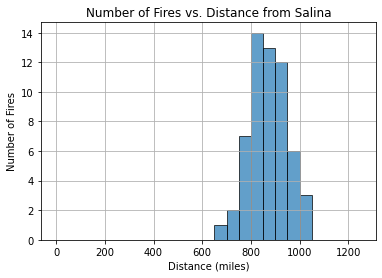

In [13]:
max_distance = analysis_data['shortest_dist'].max()
bin_width = 50

bins = np.arange(0, max_dist + bin_width, bin_width)

plt.hist(analysis_data['shortest_dist'], bins=bins, edgecolor='k', alpha=0.7)

plt.xlabel('Distance (miles)')
plt.ylabel('Number of Fires')
plt.title('Number of Fires vs. Distance from Salina')
plt.grid(True)

plt.show()

## Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from Salina.

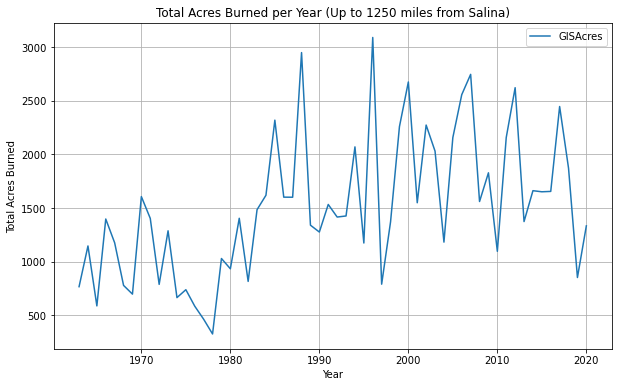

In [14]:
acres_burned_per_year = filtered_data.groupby('Year')['GISAcres'].sum()

plt.figure(figsize=(10, 6))
acres_burned_per_year.plot(legend=True)
plt.title(f'Total Acres Burned per Year (Up to {max_dist} miles from Salina)')
plt.xlabel('Year')
plt.ylabel('Total Acres Burned')
plt.grid(True)
plt.show()

## Produce a time series graph containing fire smoke estimate and the AQI estimate for Salina.

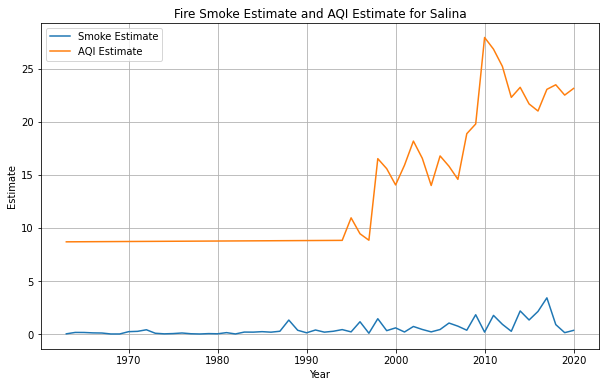

In [15]:
plt.figure(figsize=(10, 6))
analysis_data.set_index('Year')['Smoke_Estimate'].plot(legend=True, label='Smoke Estimate')
analysis_data.set_index('Year')['AQI'].plot(legend=True, label='AQI Estimate')
plt.title('Fire Smoke Estimate and AQI Estimate for Salina')
plt.xlabel('Year')
plt.ylabel('Estimate')
plt.grid(True)
plt.show()